#An Introduction to Bayesian Statistics
####"When the facts change, I change my mind. What do you do sir? - John Maynard Keynes

###A Brief History of Classical Statistics

Basic Classical Statistics can seem pretty obscure at times. One phrase that comes to mind are the often confusing statements: “we fail to reject the null hypothesis.” As new student to statistics will inevitably wonder, "who thought it was a good idea to use a double negative?". Then to follow-up classical statisticians talk about terms such as type-I and type-II hypothesis error.

Oftentimes the hyposesis themselves don't seem all to useful. Consider the conclusions we gather, it’s usually something about whether the means of two populations or samples are the different but not by how much their different. 

To understand why Classical Statistics got the way it is we have to understand how it all started. The basic statistical methods that we know today were developed in the late 19th and early 20th centuries. There were no computational capabilities so all computations had to be performed with pen and paper. Big data didn't exist, there was no such this as open data. Data collection was very expensive and usually resulted in very small data sets rittled with survey errors (uncontrolled variables and biases).
Data sets were small (often not more than four to five points) and could be obtained only with great difficulty. Classical Statistics was developed to handle these issues

###A Brief History of Bayasian Statistics

Bayesian Statistics on the other hand is much  more intuitive. Consider how we think...

#####1) You know some information from prior experiences

#####2) You learn something new

#####3) You update your beliefs based on the new data, but still remembering your prior experiences









######Consider the following the the book Bayesian Methods for Hackers...

John Maynard Keynes, a great economist and thinker, said "When the facts change, I change my mind. What do you do, sir?" This quote reflects the way a Bayesian updates his or her beliefs after seeing evidence. Even — especially — if the evidence is counter to what was initially believed, the evidence cannot be ignored. We denote our updated belief as P(A|X), interpreted as the probability of A given the evidence X. We call the updated belief the posterior probability so as to contrast it with the prior probability. For example, consider the posterior probabilities (read: posterior beliefs) of the above examples, after observing some evidence X:

####1. P(A): the coin has a 50 percent chance of being Heads. P(A|X): You look at the coin, observe a Heads has landed, denote this information X, and trivially assign probability 1.0 to Heads and 0.0 to Tails.

####2. P(A): This big, complex code likely has a bug in it. P(A|X): The code passed all X tests; there still might be a bug, but its presence is less likely now.

####3. P(A): The patient could have any number of diseases. P(A|X): Performing a blood test generated evidence X, ruling out some of the possible diseases from consideration.

It's clear that in each example we did not completely discard the prior belief after seeing new evidence X, but we re-weighted the prior to incorporate the new evidence (i.e. we put more weight, or confidence, on some beliefs versus others).

Our Bayesian framework
We are interested in beliefs, which can be interpreted as probabilities by thinking Bayesian. We have a prior belief in event A, beliefs formed by previous information, e.g., our prior belief about bugs being in our code before performing tests.

Secondly, we observe our evidence. To continue our buggy-code example: if our code passes X tests, we want to update our belief to incorporate this. We call this new belief the posterior probability. Updating our belief is done via the following equation, known as Bayes' Theorem, after its discoverer Thomas Bayes:

P(A|X)=P(X|A)P(A)P(X)∝P(X|A)P(A)(∝is proportional to )
The above formula is not unique to Bayesian inference: it is a mathematical fact with uses outside Bayesian inference. Bayesian inference merely uses it to connect prior probabilities P(A) with an updated posterior probabilities P(A|X).

In [21]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats


figsize(11, 9)



In [22]:
dist = stats.beta
n_trials = np.arange(0,100,10)


In [23]:
data = stats.bernoulli.rvs(.5,size=n_trials[-1])
x = np.linspace(0, 1, 100)

In [24]:
n_trials

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

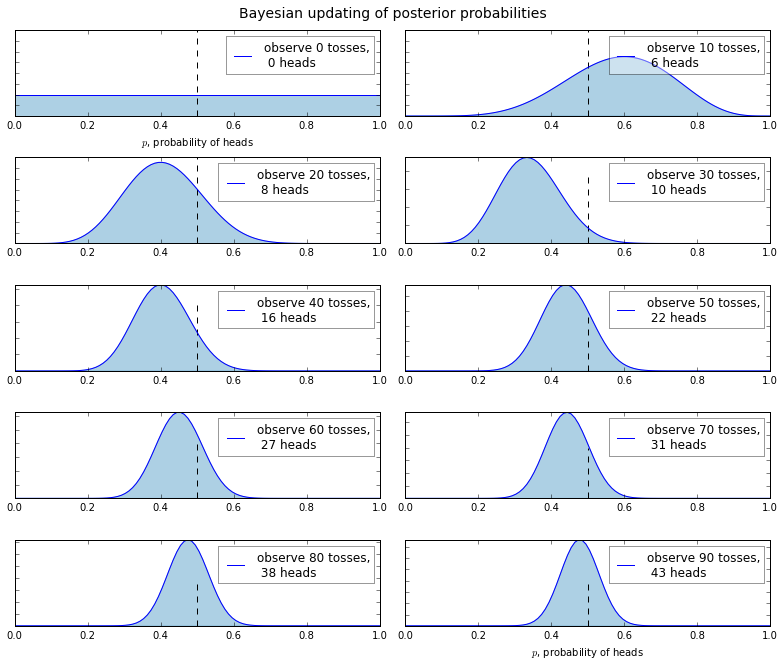

In [32]:
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) / 2, 2, k + 1)

    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials) - 1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)


    leg = plt.legend()
    leg.get_frame().set_alpha(.4)
    plt.autoscale(tight=True,)

plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

In [102]:
a = np.arange(16)
poi = stats.poisson
lambda_ = [1,2,5]
colours = ['blue', 'red']

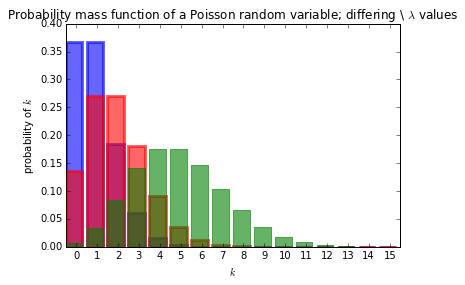

In [122]:
plt.bar(a,poi.pmf(a, lambda_[0]), color = 'blue', 
        label = '$\lambda = %.1f$' % lambda_[0],
        alpha = .6, edgecolor = 'blue', lw = "3")

plt.bar(a,poi.pmf(a, lambda_[1]), color = 'red', 
        label = '$\lambda = %.1f$' % lambda_[1],
        alpha = .6, edgecolor = 'red', lw = "3")

plt.bar(a, poi.pmf(a, lambda_[2]), color = 'green',
        label = '$\lambda = %.1f$' % lambda_[2],
        alpha = .6, edgecolor = 'green', lw = "1")

plt.xticks(a + 1/2, a)
plt.legend
plt.ylabel("probability of $k$")
plt.xlabel("$k$")
plt.title("Probability mass function of a Poisson random variable; differing \ $\lambda$ values")